#Assignment
##1. Download an Image from Internet and Convert it into Gray Scale, Crop it and make it square then plot its histogram and its fourier transform.


In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math

Text(0.5, 0.98, 'Comparision of BGR to RGB')

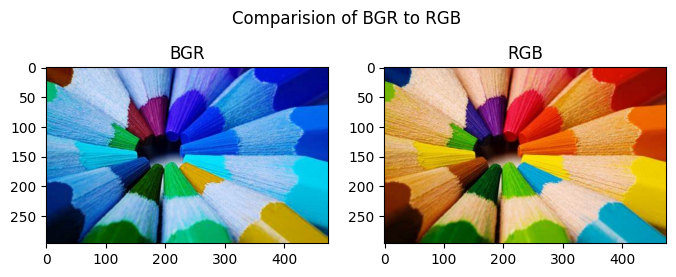

In [2]:
# Load the input image
image = cv2.imread('image.jpg', cv2.IMREAD_COLOR)

fig,ax=plt.subplots(1,2,figsize=(8,3))
ax[0].imshow(image)
ax[0].set_title("BGR")
image2 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
ax[1].imshow(image2)
ax[1].set_title("RGB")
fig.suptitle("Comparision of BGR to RGB")

## Convert the image to Grey Scale.

Text(0.5, 0.98, 'Comparision of RGB to GRAY')

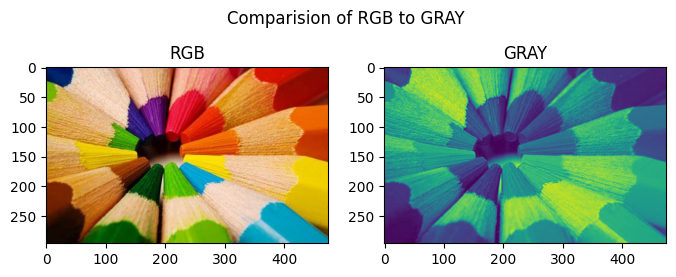

In [3]:
fig,ax=plt.subplots(1,2,figsize=(8,3))
ax[0].imshow(image2)
ax[0].set_title("RGB")
gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
ax[1].imshow(gray_image)
ax[1].set_title("GRAY")
fig.suptitle("Comparision of RGB to GRAY")

In [4]:
print("Shape of the image", gray_image.shape)

Shape of the image (296, 474)


In [5]:
crop = gray_image[50:180, 100:300]

## Crop the Gray Image


Original Dimension :  (296, 474)
Cropped Dimension :  (130, 200)


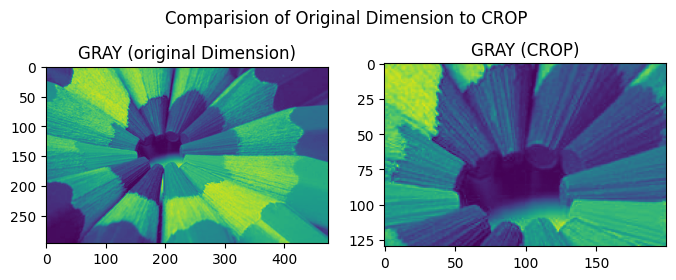

In [6]:
print("Original Dimension : ",gray_image.shape)

fig,ax=plt.subplots(1,2,figsize=(8,3))
ax[0].imshow(gray_image)
ax[0].set_title("GRAY (original Dimension)")
crop_image = gray_image[50:180, 100:300]     #croped from (50,100) pixel to (180,300) pixel
ax[1].imshow(crop_image)
ax[1].set_title("GRAY (CROP)")
fig.suptitle("Comparision of Original Dimension to CROP")

print("Cropped Dimension : ",crop_image.shape)

##Convert to Square Image


Original Dimension :  (296, 474)
Cropped Dimension :  (130, 200)


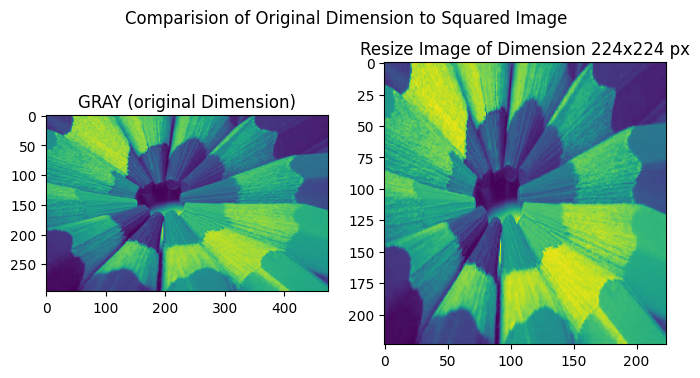

In [7]:
print("Original Dimension : ",gray_image.shape)
size = (224,224)

fig,ax=plt.subplots(1,2,figsize=(8,4))
ax[0].imshow(gray_image)
ax[0].set_title("GRAY (original Dimension)")
sq_image = cv2.resize(gray_image,size)
ax[1].imshow(sq_image)
ax[1].set_title("Resize Image of Dimension 224x224 px")
fig.suptitle("Comparision of Original Dimension to Squared Image")

print("Cropped Dimension : ",crop_image.shape)

##Plot the histogram

In [8]:
len(sq_image)

224

Text(0.5, 1.0, 'HISTOGRAM')

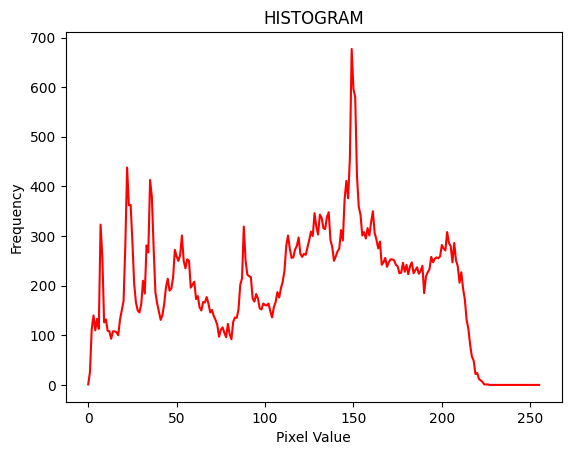

In [9]:
hist = np.zeros(256)

for i in range(0,len(sq_image)):
    for j in range(0,len(sq_image)):
        hist[sq_image[i][j]] += 1

plt.plot(hist,c = "r")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.title("HISTOGRAM")

##Compute the Fourier Transform of image


Text(0.5, 0.98, 'Fourier Transfrom')

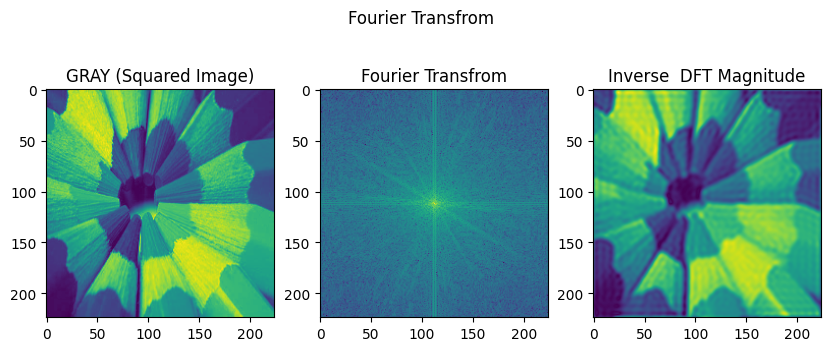

In [10]:
# Compute the discrete Fourier Transform of the image
fourier = cv2.dft(np.float32(sq_image), flags=cv2.DFT_COMPLEX_OUTPUT)
 
# Shift the zero-frequency component to the center of the spectrum
fourier_shift = np.fft.fftshift(fourier)
 
# calculate the magnitude of the Fourier Transform
magnitude = 20*np.log(cv2.magnitude(fourier_shift[:,:,0],fourier_shift[:,:,1]))
 
# Scale the magnitude for display
magnitude = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8UC1)

row, col = sq_image.shape
center_row, center_col = row // 2, col // 2
 
# create a mask with a centered square of 1s
mask = np.zeros((row, col, 2), np.uint8)
mask[center_row - 30:center_row + 30, center_col - 30:center_col + 30] = 1
 
# put the mask and inverse DFT in place.
fft_shift = fourier_shift * mask
fft_ifft_shift = np.fft.ifftshift(fft_shift)
imageThen = cv2.idft(fft_ifft_shift)
 
# calculate the magnitude of the inverse DFT
inv_dft_magnitude = cv2.magnitude(imageThen[:,:,0], imageThen[:,:,1])

#visulaize the images, fourier transform and magnitude
fig,ax=plt.subplots(1,3,figsize=(10,4))
ax[0].imshow(sq_image)
ax[0].set_title("GRAY (Squared Image)")
ax[1].imshow(magnitude)
ax[1].set_title("Fourier Transfrom")

ax[2].imshow(inv_dft_magnitude)
ax[2].set_title("Inverse  DFT Magnitude")
fig.suptitle("Fourier Transfrom")

<hr><hr>

## 2. Write a program to:
a. flip the image<br>
b. blur the image using gaussian filter

Text(0.5, 0.98, 'FLIPPED image')

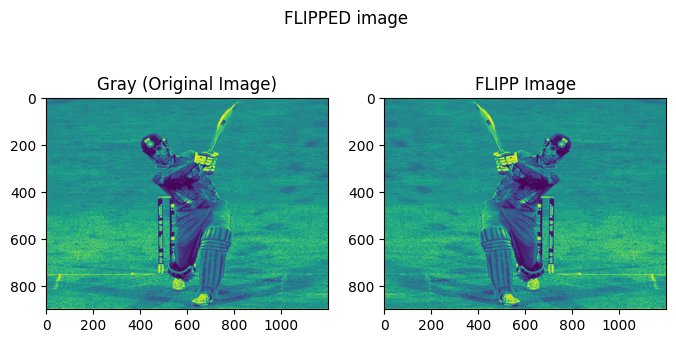

In [11]:
# a. flip the image 

image3 = cv2.imread('dhoni.jpg',cv2.IMREAD_GRAYSCALE)

fig,ax=plt.subplots(1,2,figsize=(8,4))
ax[0].imshow(image3)
ax[0].set_title("Gray (Original Image)")
flipped = cv2.flip(image3,1)
ax[1].imshow(flipped)
ax[1].set_title("FLIPP Image")
fig.suptitle("FLIPPED image")

Text(0.5, 0.98, 'BLURRED image')

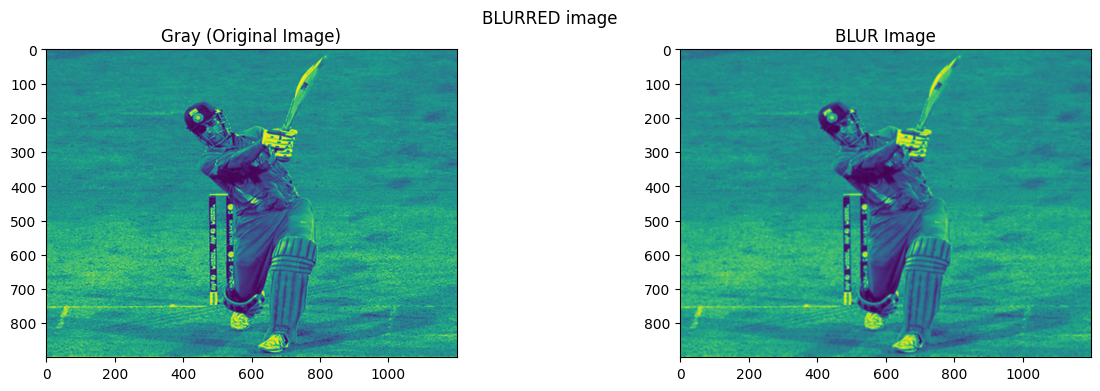

In [12]:
# b. blur the image


fig,ax=plt.subplots(1,2,figsize=(15,4))
ax[0].imshow(image3)
ax[0].set_title("Gray (Original Image)")
blur_image = cv2.GaussianBlur(image3,(5,5),cv2.BORDER_DEFAULT)
ax[1].imshow(blur_image)
ax[1].set_title("BLUR Image")
fig.suptitle("BLURRED image")



<hr><hr>

## 3. Canny Edge Detection

Text(0.5, 0.98, 'Canny Edge Detection')

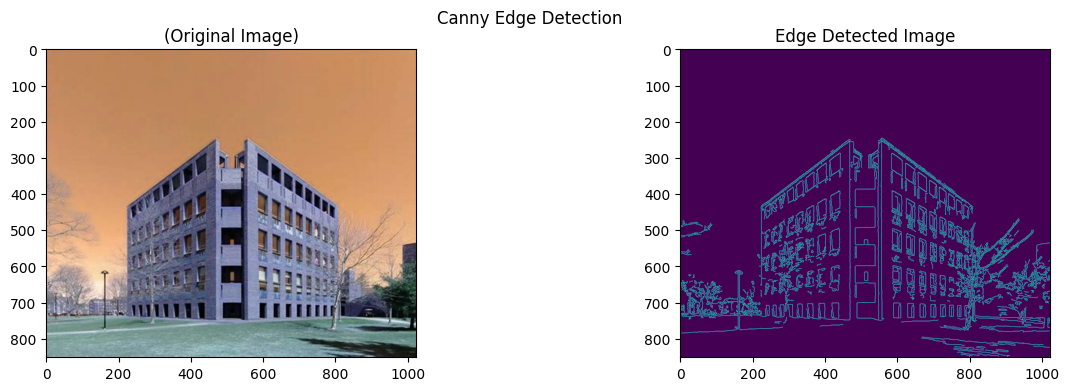

In [13]:
image4 = cv2.imread("building.jpg",-1) # Read image
  
# Defining all the parameters
t_lower = 100 # Lower Threshold
t_upper = 200 # Upper threshold
# aperture_size = 5 # Aperture size
# L2Gradient = True # Boolean
  
# Applying the Canny Edge filter 
# with Aperture Size and L2Gradient
edge = cv2.Canny(image4, t_lower, t_upper)
                 #apertureSize = aperture_size)
                 #L2gradient = L2Gradient )
# lines = cv2.HoughLines(edge, 1, np.pi / 180, 155)

fig,ax=plt.subplots(1,2,figsize=(15,4))
ax[0].imshow(image4)
ax[0].set_title("(Original Image)")
ax[1].imshow(edge)
ax[1].set_title("Edge Detected Image")
fig.suptitle("Canny Edge Detection")

In [14]:
def draw_lines(img, houghLines, color=[0, 255, 0], thickness=2):
    for line in houghLines:
        for rho,theta in line:
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a*rho
            y0 = b*rho
            x1 = int(x0 + 1000*(-b))
            y1 = int(y0 + 1000*(a))
            x2 = int(x0 - 1000*(-b))
            y2 = int(y0 - 1000*(a))
 
            cv2.line(img,(x1,y1),(x2,y2),color,thickness)   
                
 
def weighted_img(img, initial_img, α=0.8, β=1., λ=0.):
    return cv2.addWeighted(initial_img, α, img, β, λ)

In [15]:
# rho_resolution = 1
# theta_resolution = np.pi/180
# threshold = 155
 
# hough_lines = cv2.HoughLines(edge, rho_resolution , theta_resolution , threshold)
 
# hough_lines_image = np.zeros_like(image4)
# draw_lines(hough_lines_image, hough_lines)
# original_image_with_hough_lines = weighted_img(hough_lines_image,image4)



In [16]:
# fig,ax=plt.subplots(1,2,figsize=(15,4))

# ax[0].imshow(edge)
# ax[0].set_title("Edge Detected Image")
# ax[1].imshow(hough_lines_image)
# ax[1].set_title("Gray (Original Image)")
# fig.suptitle("Canny Edge Detection")

##Canny Edge Detection to Strainght Line

Text(0.5, 1.0, 'Hough_lines')

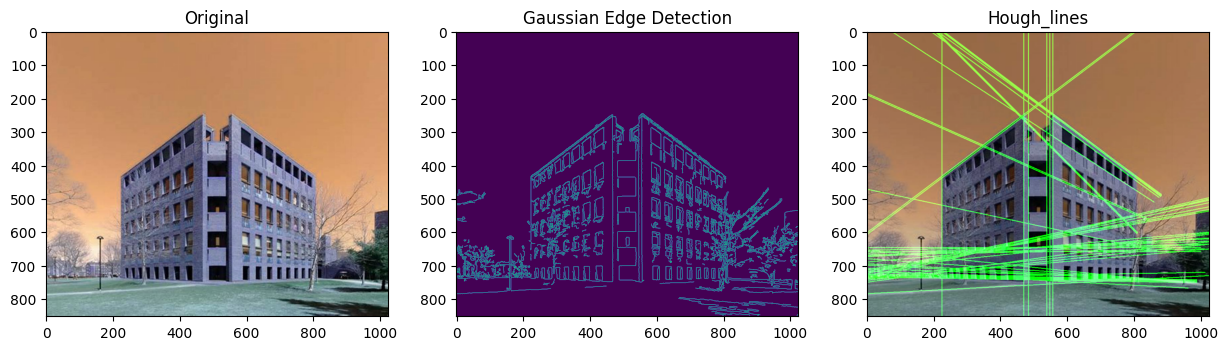

In [17]:
rho_resolution = 1
theta_resolution = np.pi/180
threshold = 155
 
hough_lines = cv2.HoughLines(edge, rho_resolution , theta_resolution , threshold)

 
hough_lines_image = np.zeros_like(image4)
draw_lines(hough_lines_image, hough_lines)
original_image_with_hough_lines = weighted_img(hough_lines_image,image4)
 


fig,ax=plt.subplots(1,3,figsize=(15,4))

ax[0].imshow(image4)
ax[0].set_title("Original")
ax[1].imshow(edge)
ax[1].set_title("Gaussian Edge Detection")
ax[2].imshow(original_image_with_hough_lines)
ax[2].set_title("Hough_lines")

Text(0.5, 1.0, 'Laplacian of Gaussian')

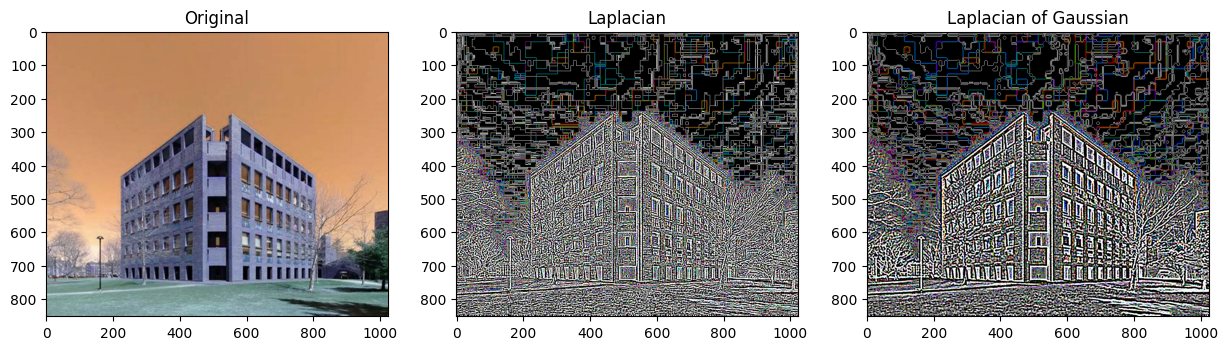

In [18]:
laplacian = cv2.Laplacian(image4,cv2.CV_64F)

blur_img4 = cv2.GaussianBlur(image4,(5,5),cv2.BORDER_DEFAULT)

laplacian1 = cv2.Laplacian(blur_img4,cv2.CV_64F)

fig,ax=plt.subplots(1,3,figsize=(15,4))

ax[0].imshow(image4)
ax[0].set_title("Original")
ax[1].imshow(laplacian)
ax[1].set_title("Laplacian")
ax[2].imshow(laplacian1)
ax[2].set_title("Laplacian of Gaussian")